In [10]:
import numpy as np
import matplotlib.pyplot as plt

In [24]:

X = np.array([
    [2, 3], [3, 3], [3, 2], [5, 2], [2, 5], [3, 2], [2, 4], # Class +1 data points
    [6, 5], [7, 7], [8, 6], [9, 6], [9, 3], [9, 9], [8, 7]  # Class -1 data points
])

# Corrected labels array (14 elements, all integers)
y = np.array([
    1, 1, 1, 1, 1, 1, 1,  # Labels for Class +1
    -1, -1, -1, -1, -1, -1, -1   # Labels for Class -1
])


In [25]:
X.shape

(14, 2)

In [26]:
y.shape

(14,)

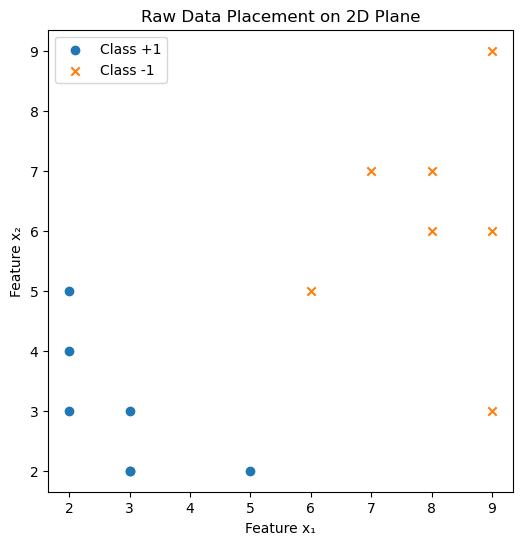

In [32]:
plt.figure(figsize=(6,6))

# Plot class +1
plt.scatter(
    X[y == 1][:, 0],
    X[y == 1][:, 1],
    marker='o',
    label='Class +1'
)

# Plot class -1
plt.scatter(
    X[y == -1][:, 0],
    X[y == -1][:, 1],
    marker='x',
    label='Class -1'
)

plt.xlabel("Feature x₁")
plt.ylabel("Feature x₂")
plt.title("Raw Data Placement on 2D Plane")
plt.legend()
plt.show()

In [27]:
class SVM:
    def __init__(self, lr=0.01, lambda_param=0.01, n_iters=1000):
        self.lr = lr
        self.lambda_param = lambda_param
        self.n_iters = n_iters
        self.w = None
        self.b = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.w = np.zeros(n_features)
        self.b = 0

        for _ in range(self.n_iters):
            for idx, x_i in enumerate(X):
                condition = y[idx] * (np.dot(x_i, self.w) + self.b) >= 1

                if condition:
                    self.w -= self.lr * (2 * self.lambda_param * self.w)
                else:
                    self.w -= self.lr * (2 * self.lambda_param * self.w - y[idx] * x_i)
                    self.b += self.lr * y[idx]

    def predict(self, X):
        return np.sign(np.dot(X, self.w) + self.b)


In [28]:
svm = SVM()
svm.fit(X, y)

print("Weights:", svm.w)
print("Bias:", svm.b)


Weights: [-0.54727408 -0.59283896]
Bias: 5.239999999999933


In [29]:
def plot_svm(X, y, model):
    plt.scatter(X[:,0], X[:,1], c=y, cmap='bwr')

    x1 = np.linspace(0, 9, 100)
    x2 = -(model.w[0] * x1 + model.b) / model.w[1]

    margin1 = -(model.w[0] * x1 + model.b - 1) / model.w[1]
    margin2 = -(model.w[0] * x1 + model.b + 1) / model.w[1]

    plt.plot(x1, x2, 'k')
    plt.plot(x1, margin1, 'k--')
    plt.plot(x1, margin2, 'k--')

    plt.title("SVM from Scratch")
    plt.show()

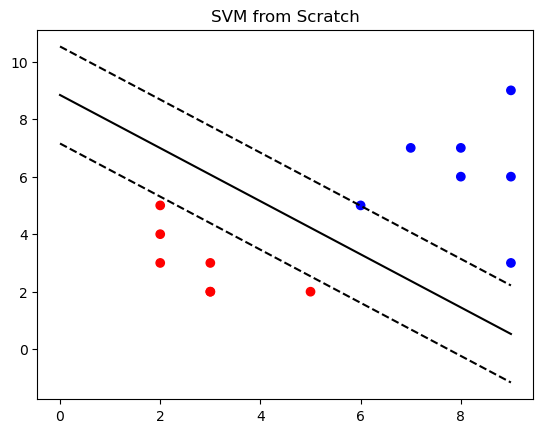

In [30]:
plot_svm(X, y, svm)